In [72]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [73]:
diamonds = sns.load_dataset('diamonds')
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [74]:
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [75]:
diamonds.nunique()

carat        273
cut            5
color          7
clarity        8
depth        184
table        127
price      11602
x            554
y            552
z            375
dtype: int64

In [76]:
diamonds.cut.value_counts()

cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64

In [77]:
def uncategorize(col):
    if col.dtype.name == 'category':
        try:
            return col.astype(col.cat.categories.dtype)
        except:
            # In case there is pd.NA (pandas >= 1.0), Int64 should be used instead of int64
            return col.astype(col.cat.categories.dtype.name.title())           
    else:
        return col
    
diamonds.apply(uncategorize, axis=0)
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [78]:
categories = ['cut', 'color', 'clarity']
dummies = pd.get_dummies(diamonds[categories])
dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   cut_Ideal      53940 non-null  bool 
 1   cut_Premium    53940 non-null  bool 
 2   cut_Very Good  53940 non-null  bool 
 3   cut_Good       53940 non-null  bool 
 4   cut_Fair       53940 non-null  bool 
 5   color_D        53940 non-null  bool 
 6   color_E        53940 non-null  bool 
 7   color_F        53940 non-null  bool 
 8   color_G        53940 non-null  bool 
 9   color_H        53940 non-null  bool 
 10  color_I        53940 non-null  bool 
 11  color_J        53940 non-null  bool 
 12  clarity_IF     53940 non-null  bool 
 13  clarity_VVS1   53940 non-null  bool 
 14  clarity_VVS2   53940 non-null  bool 
 15  clarity_VS1    53940 non-null  bool 
 16  clarity_VS2    53940 non-null  bool 
 17  clarity_SI1    53940 non-null  bool 
 18  clarity_SI2    53940 non-null  bool 
 19  clar

In [79]:
diamondDummies = diamonds.drop(columns=categories)
diamondDummies = diamondDummies.join(dummies)
diamondDummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   carat          53940 non-null  float64
 1   depth          53940 non-null  float64
 2   table          53940 non-null  float64
 3   price          53940 non-null  int64  
 4   x              53940 non-null  float64
 5   y              53940 non-null  float64
 6   z              53940 non-null  float64
 7   cut_Ideal      53940 non-null  bool   
 8   cut_Premium    53940 non-null  bool   
 9   cut_Very Good  53940 non-null  bool   
 10  cut_Good       53940 non-null  bool   
 11  cut_Fair       53940 non-null  bool   
 12  color_D        53940 non-null  bool   
 13  color_E        53940 non-null  bool   
 14  color_F        53940 non-null  bool   
 15  color_G        53940 non-null  bool   
 16  color_H        53940 non-null  bool   
 17  color_I        53940 non-null  bool   
 18  color_

In [80]:
diamondDummies

,carat,depth,table,price,x,y,z,cut_Ideal,cut_Premium,cut_Very Good,...,color_I,color_J,clarity_IF,clarity_VVS1,clarity_VVS2,clarity_VS1,clarity_VS2,clarity_SI1,clarity_SI2,clarity_I1
0,0.23,61.5,55.0,326,3.95,3.98,2.43,True,False,False,...,False,False,False,False,False,False,False,False,True,False
1,0.21,59.8,61.0,326,3.89,3.84,2.31,False,True,False,...,False,False,False,False,False,False,False,True,False,False
2,0.23,56.9,65.0,327,4.05,4.07,2.31,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,0.29,62.4,58.0,334,4.20,4.23,2.63,False,True,False,...,True,False,False,False,False,False,True,False,False,False
4,0.31,63.3,58.0,335,4.34,4.35,2.75,False,False,False,...,False,True,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,True,False,False,...,False,False,False,False,False,False,False,True,False,False
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,False,False,False,...,False,False,False,False,False,False,False,True,False,False
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,False,False,True,...,False,False,False,False,False,False,False,True,False,False
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,False,True,False,...,False,False,False,False,False,False,False,False,True,False


In [81]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [82]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numCols = ['carat', 'depth', 'table', 'x', 'y', 'z']
diamondDummies[numCols] = scaler.fit_transform(diamondDummies[numCols])
diamondDummies.head()

,carat,depth,table,price,x,y,z,cut_Ideal,cut_Premium,cut_Very Good,...,color_I,color_J,clarity_IF,clarity_VVS1,clarity_VVS2,clarity_VS1,clarity_VS2,clarity_SI1,clarity_SI2,clarity_I1
0,-1.198168,-0.174092,-1.099672,326,-1.587837,-1.536196,-1.571129,True,False,False,...,False,False,False,False,False,False,False,False,True,False
1,-1.240361,-1.360738,1.585529,326,-1.641325,-1.658774,-1.741175,False,True,False,...,False,False,False,False,False,False,False,True,False,False
2,-1.198168,-3.385019,3.375663,327,-1.498691,-1.457395,-1.741175,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,-1.071587,0.454133,0.242928,334,-1.364971,-1.317305,-1.287720,False,True,False,...,True,False,False,False,False,False,True,False,False,False
4,-1.029394,1.082358,0.242928,335,-1.240167,-1.212238,-1.117674,False,False,False,...,False,True,False,False,False,False,False,False,True,False


In [83]:
diamondDummies.corr()[['price']].sort_values(by='price', ascending=False)

,price
price,1.000000
carat,0.921591
x,0.884435
y,0.865421
z,0.861249
clarity_SI2,0.128420
table,0.127134
color_I,0.097125
cut_Premium,0.095706
color_J,0.081710


<Axes: >

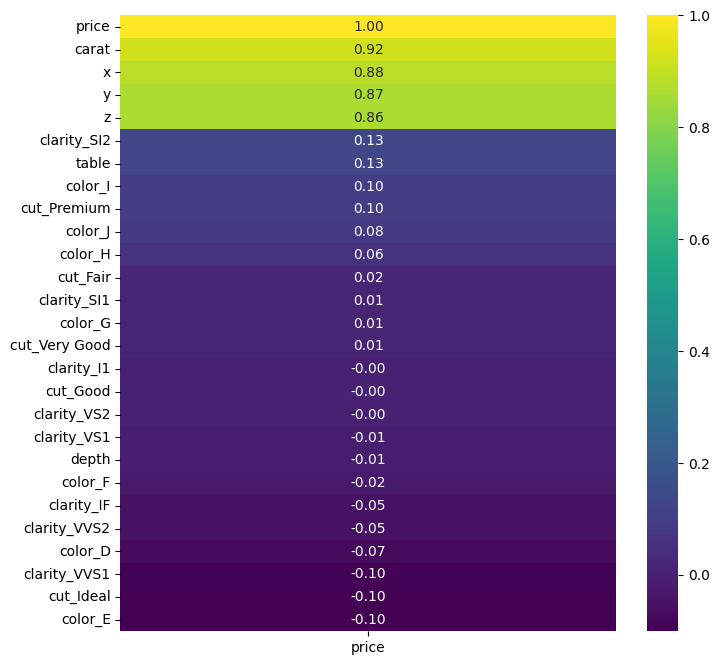

In [84]:
# Question 1

fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(data=diamondDummies.corr()[['price']].sort_values(by='price', ascending=False),
            annot=True, cmap='viridis', fmt=f'.2f')

In [85]:
x_train, x_test, y_train, y_test = train_test_split(
    diamonds[['carat']], diamonds[['price']],
    test_size=0.30, random_state=20)
linearModel = LinearRegression()
linearModel.fit(x_train, y_train)
linearModel.score(x_test, y_test)

0.8504107786474794

In [86]:
test = x_test, y_test

In [87]:
y_predicted = linearModel.predict(x_test)
y_predicted

array([[9540.64191438],
       [1940.07543252],
       [3180.98424589],
       ...,
       [9618.19871522],
       [-464.18539337],
       [5507.68827094]])

In [88]:
predicted = pd.DataFrame(y_predicted, columns=['predicted_price'])
predicted

,predicted_price
0,9540.641914
1,1940.075433
2,3180.984246
3,2327.859437
4,4421.893059
...,...
16177,156.269013
16178,5585.245072
16179,9618.198715
16180,-464.185393


In [89]:
combined = predicted.join([x_test.reset_index(drop=True),
                          y_test.reset_index(drop=True)])
combined

,predicted_price,carat,price
0,9540.641914,1.52,8674
1,1940.075433,0.54,1637
2,3180.984246,0.70,2657
3,2327.859437,0.59,1838
4,4421.893059,0.86,2980
...,...,...,...
16177,156.269013,0.31,914
16178,5585.245072,1.01,5932
16179,9618.198715,1.53,8971
16180,-464.185393,0.23,498


In [90]:
melted = pd.melt(combined, id_vars=['carat'],
                 value_vars=['price', 'predicted_price'],
                 var_name='price_type', value_name='price_value')
melted

,carat,price_type,price_value
0,1.52,price,8674.000000
1,0.54,price,1637.000000
2,0.70,price,2657.000000
3,0.59,price,1838.000000
4,0.86,price,2980.000000
...,...,...,...
32359,0.31,predicted_price,156.269013
32360,1.01,predicted_price,5585.245072
32361,1.53,predicted_price,9618.198715
32362,0.23,predicted_price,-464.185393


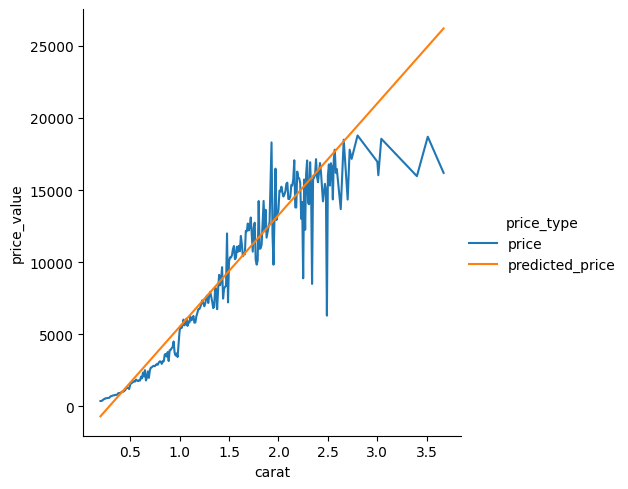

In [91]:
sns.relplot(data=melted, kind='line', x='carat', y='price_value', hue='price_type', errorbar=None)

c:\Python312\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)


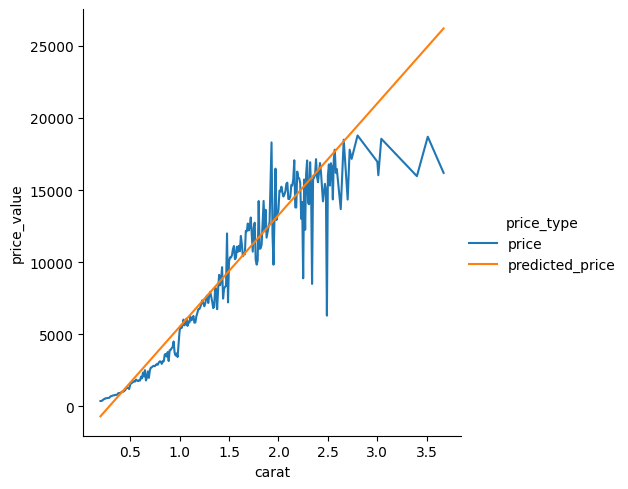

In [92]:
sns.relplot(data=melted, kind='line', x='carat', y='price_value', hue='price_type', ci=None)

In [93]:
mpg = sns.load_dataset('mpg')
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [107]:
num_data = mpg.select_dtypes(include=['float64', 'int64'])
corr = num_data.corr()


In [111]:
num_data.corr()[['mpg']].sort_values(by='mpg', ascending=False)

,mpg
mpg,1.000000
model_year,0.579267
acceleration,0.420289
cylinders,-0.775396
horsepower,-0.778427
displacement,-0.804203
weight,-0.831741


In [112]:
x_train, x_test, y_train, y_test = train_test_split(
    mpg[['weight']], mpg[['mpg']],
    test_size=0.20, random_state=20)
model = LinearRegression()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.6913392734724183

In [113]:
model.score(x_train, y_train)

0.6863542676327211

In [114]:
y_predicted = model.predict(x_test)

In [115]:
predicted = pd.DataFrame(y_predicted, columns=['predicted_mpg'])
predicted

,predicted_mpg
0,18.868866
1,20.015039
2,28.180585
3,20.015039
4,26.180401
...,...
75,25.071685
76,30.727636
77,26.644863
78,10.111506


In [116]:
combined = predicted.join([x_test.reset_index(drop=True),
                           y_test.reset_index(drop=True)])
combined

,predicted_mpg,weight,mpg
0,18.868866,3563,15.0
1,20.015039,3410,18.1
2,28.180585,2320,34.5
3,20.015039,3410,16.2
4,26.180401,2587,21.0
...,...,...,...
75,25.071685,2735,27.0
76,30.727636,1980,36.0
77,26.644863,2525,29.0
78,10.111506,4732,9.0


In [117]:
combined['residuals'] = combined.mpg - combined.predicted_mpg
combined.head()

,predicted_mpg,weight,mpg,residuals
0,18.868866,3563,15.0,-3.868866
1,20.015039,3410,18.1,-1.915039
2,28.180585,2320,34.5,6.319415
3,20.015039,3410,16.2,-3.815039
4,26.180401,2587,21.0,-5.180401


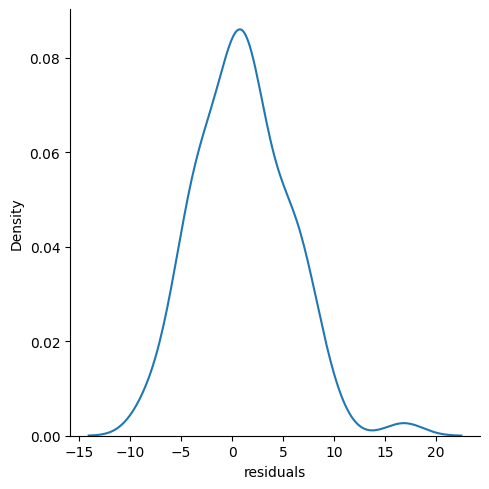

In [118]:
sns.displot(data=combined, x='residuals', kind='kde')


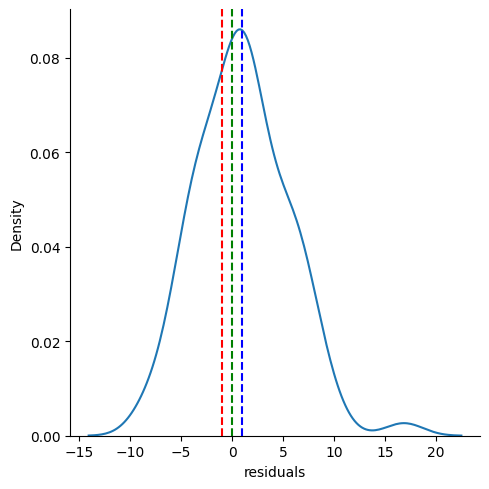

In [103]:
sns.displot(data=combined, x='residuals', kind='kde')
plt.axvline(x=0, color='green', linestyle='--')
plt.axvline(x=-1, color='red', linestyle='--')
plt.axvline(x=1, color='blue', linestyle='--')
plt.show()

In [104]:
melted = pd.melt(combined, id_vars=['weight'],
                 value_vars=['mpg', 'predicted_mpg'],
                 var_name='mpg_type', value_name='mpg_value')
melted

,weight,mpg_type,mpg_value
0,3563,mpg,15.000000
1,3410,mpg,18.100000
2,2320,mpg,34.500000
3,3410,mpg,16.200000
4,2587,mpg,21.000000
...,...,...,...
155,2735,predicted_mpg,25.071685
156,1980,predicted_mpg,30.727636
157,2525,predicted_mpg,26.644863
158,4732,predicted_mpg,10.111506


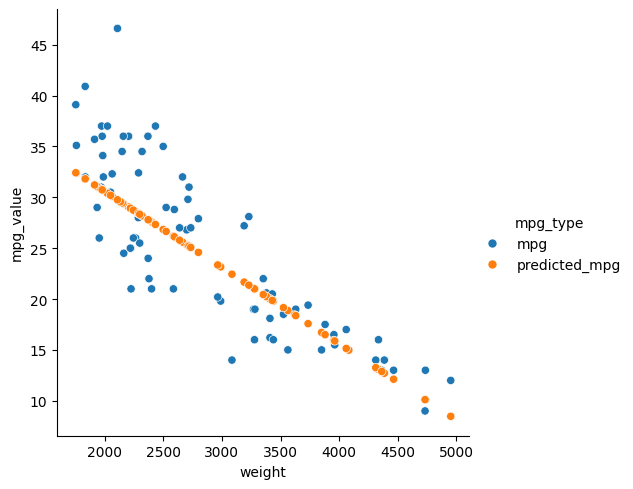

In [105]:
sns.relplot(melted, x='weight', y='mpg_value', hue='mpg_type')